<a href="https://colab.research.google.com/github/rlancaster243/random-projects/blob/main/dynamic_factor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-e66cc736673d>:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  time_index = pd.date_range(start="2000-01-01", periods=n_obs, freq="Q")  # Quarterly data
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


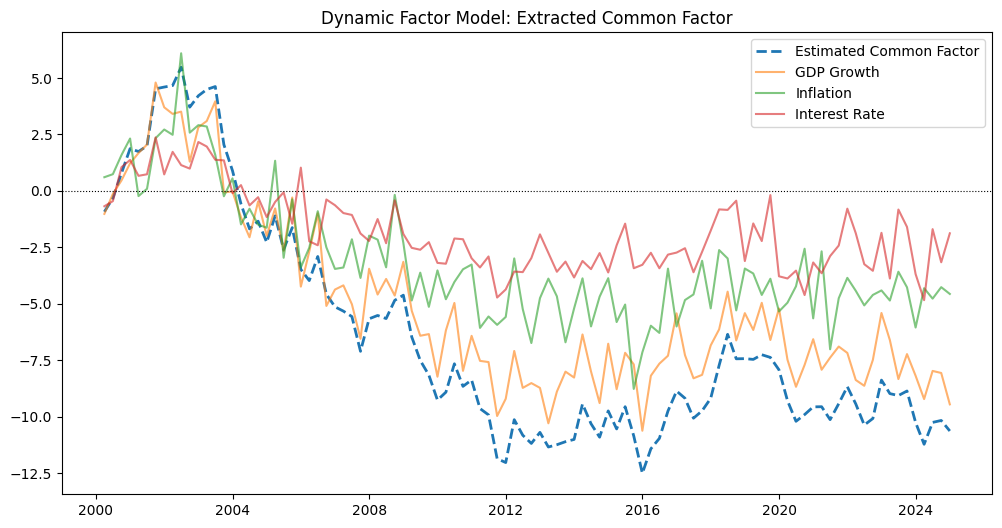

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

# Set random seed for reproducibility
np.random.seed(42)

# Simulating macroeconomic data (e.g., GDP growth, inflation, interest rates)
n_obs = 100  # Number of observations (time points)
time_index = pd.date_range(start="2000-01-01", periods=n_obs, freq="Q")  # Quarterly data

# Simulating a latent factor (economic cycle)
factor = np.cumsum(np.random.normal(0, 1, n_obs))  # Random walk factor

# Generate observed variables influenced by the factor
gdp_growth = 0.8 * factor + np.random.normal(0, 1, n_obs)  # GDP growth
inflation = 0.5 * factor + np.random.normal(0, 1, n_obs)   # Inflation rate
interest_rate = 0.3 * factor + np.random.normal(0, 1, n_obs)  # Interest rate

# Create DataFrame
df = pd.DataFrame({'GDP Growth': gdp_growth, 'Inflation': inflation, 'Interest Rate': interest_rate}, index=time_index)

# Fit a Dynamic Factor Model (DFM) with one common factor
dfm_model = DynamicFactor(df, k_factors=1, factor_order=1)
dfm_results = dfm_model.fit(disp=False)

# Extract the estimated factor
# Corrected line: Access the first element directly to get the estimated factor for all time periods
df['Estimated Factor'] = dfm_results.factors.filtered[0]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Estimated Factor'], label='Estimated Common Factor', linestyle='dashed', linewidth=2)
plt.plot(df.index, df['GDP Growth'], alpha=0.6, label='GDP Growth')
plt.plot(df.index, df['Inflation'], alpha=0.6, label='Inflation')
plt.plot(df.index, df['Interest Rate'], alpha=0.6, label='Interest Rate')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dotted')
plt.legend()
plt.title("Dynamic Factor Model: Extracted Common Factor")
plt.show()